In [2]:
#라이브러리
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import openpyxl
from time import sleep

In [ ]:
#함수화 할 것들



기능 및 구현: 환율 계산기, 환율 데이터(일별), 그래프(기간).
결과: 비교(변동률)

In [7]:
chrome_options = Options()
chrome_options.add_experimental_option("detach", True)

service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get("https://m.stock.naver.com/marketindex/home/exchangeRate/exchange#exchange")


currency=input('달러: USD, 엔화: YEN, 유로: EUR / 대문자 영문으로 입력해주세요 ')

if currency == 'USD':
    word=driver.find_element(By.CSS_SELECTOR,'#content > div.MainList_article__sGjxm > ul > li:nth-child(1) > a')
    word.click()
    sleep(1)
      # 데이터 가져오기
    data = []
      # 날짜 정보 가져오기
    dates = driver.find_elements(By.CSS_SELECTOR, '.FixedPriceList_text__J7H6k .time_2PoD_')
    for date in dates:
        data.append(date.text)
    df = pd.DataFrame(data, columns=['Date'])
    # 환율 정보 가져오기
    wons = driver.find_elements(By.CSS_SELECTOR, '.FixedPriceList_text__J7H6k .price_2E-50')
    for won in wons:
        won.append(won.text)  # 날짜와 환율 정보를 공백으로 구분하여 저장


    df = pd.DataFrame(data, columns=['Won'])

    # 엑셀 파일로 저장
    df.to_excel('exchange_rates2.xlsx', index=False)

elif currency == 'YEN':
    word=driver.find_element(By.CSS_SELECTOR,'#content > div.MainList_article__sGjxm > ul > li:nth-child(3) > a')
    word.click()
    sleep(1)

elif currency == 'EUR':
    word=driver.find_element(By.CSS_SELECTOR,'#content > div.MainList_article__sGjxm > ul > li:nth-child(2) > a')
    word.click()
    sleep(1)

else : #없는 값 입력 시
    print('주요 통화 환율')
    driver.save_screenshot("./currency.jpg") # 저장할폴더/파일명




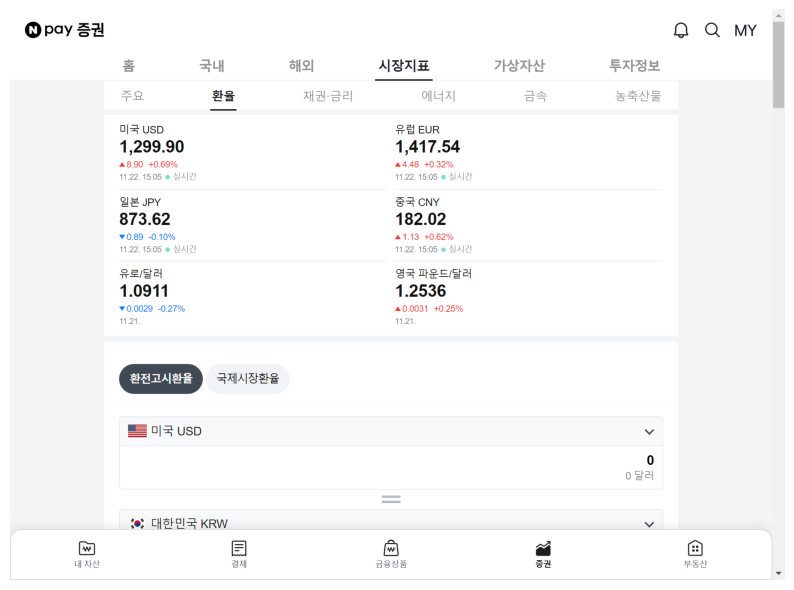

In [17]:
#이미지 출력
from PIL import Image
import matplotlib.pyplot as plt
image_path = "./currency.jpg"

# 이미지 열기
img = Image.open(image_path)

fig, ax = plt.subplots(figsize=(10, 8))
# 이미지 보여주기
plt.imshow(img)
plt.axis('off')  # 이미지 축 제거
plt.show()

주요 통화 환율


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.124)
Stacktrace:
	GetHandleVerifier [0x002672A3+45731]
	(No symbol) [0x001F2D51]
	(No symbol) [0x000E880D]
	(No symbol) [0x000CF75E]
	(No symbol) [0x0013C11B]
	(No symbol) [0x0014B2D3]
	(No symbol) [0x00137DD6]
	(No symbol) [0x001131F6]
	(No symbol) [0x0011439D]
	GetHandleVerifier [0x00570716+3229462]
	GetHandleVerifier [0x005B84C8+3523784]
	GetHandleVerifier [0x005B214C+3498316]
	GetHandleVerifier [0x002F1680+611968]
	(No symbol) [0x001FCCCC]
	(No symbol) [0x001F8DF8]
	(No symbol) [0x001F8F1D]
	(No symbol) [0x001EB2C7]
	BaseThreadInitThunk [0x773C00C9+25]
	RtlGetAppContainerNamedObjectPath [0x77BF7B4E+286]
	RtlGetAppContainerNamedObjectPath [0x77BF7B1E+238]
	(No symbol) [0x00000000]
